# Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix, r2_score,mean_absolute_error
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 10

# Change how many rows of output you see
pd.set_option('display.max_rows', 100)

## Read and Examine Data

In [4]:
strokedummy=pd.read_csv('exporteddata/out.csv')

In [5]:
strokedummy.head()

,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0


In [6]:
strokedummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   residence_type                  5109 non-null   int64  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             5109 non-null   float64
 8   stroke                          5109 non-null   int64  
 9   work_type_Never_worked          5109 non-null   int64  
 10  work_type_Private               5109 non-null   int64  
 11  work_type_Self-employed         5109 non-null   int64  
 12  work_type_children              51

## Create Function that evaluates model performance

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def class_eval(y_test, y_pred):
    print(f'accuracy  = {np.round(accuracy_score(y_test, y_pred), 3)}')
    print(f'precision = {np.round(precision_score(y_test,y_pred), 3)}')
    print(f'recall    = {np.round(recall_score(y_test, y_pred), 3)}')
    print(f'f1-score  = {np.round(f1_score(y_test, y_pred), 3)}')

# Logistic Regression Model

Since this is a classification problem with stroke as the target, I began modeling with logistic regression.

Create correlation matrix, heat map, and pair plot to determine which features to use. For first model, used age as the feature. 

Low performance due to the imbalanced dataset was addressed using random oversampling which is shown here. 

The original sample yielded F1 scores of 0 

In [8]:
strokedummy.corr()

,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,-0.027688,0.021223,0.085685,-0.030171,-0.006105,0.054722,-0.025606,0.009081,0.011486,-0.032502,-0.026045,0.089226,0.043121,-0.098952,0.011408
age,-0.027688,1.000000,0.276366,0.263776,0.679082,0.014059,0.238331,0.325859,0.245225,-0.078667,0.116677,0.327948,-0.634317,0.237346,0.119206,0.073075
hypertension,0.021223,0.276366,1.000000,0.108292,0.164187,-0.007980,0.174540,0.160147,0.127891,-0.021612,-0.005358,0.115417,-0.129535,0.059022,0.065018,0.031213
heart_disease,0.085685,0.263776,0.108292,1.000000,0.114601,0.003045,0.161907,0.038862,0.134905,-0.015715,0.000068,0.086742,-0.091654,0.066938,-0.021893,0.044030
ever_married,-0.030171,0.679082,0.164187,0.114601,1.000000,0.005988,0.155329,0.335563,0.108299,-0.090873,0.154104,0.192637,-0.544658,0.171960,0.102663,0.105132
residence_type,-0.006105,0.014059,-0.007980,0.003045,0.005988,1.000000,-0.004783,-0.000288,0.015415,0.022848,-0.018005,0.010508,-0.002388,0.008093,-0.024622,0.027185
avg_glucose_level,0.054722,0.238331,0.174540,0.161907,0.155329,-0.004783,1.000000,0.168910,0.131991,-0.014665,0.016451,0.062770,-0.102195,0.067796,0.024011,0.017716
bmi,-0.025606,0.325859,0.160147,0.038862,0.335563,-0.000288,0.168910,1.000000,0.038912,-0.028612,0.204055,0.070756,-0.442945,0.104674,0.106107,0.085516
stroke,0.009081,0.245225,0.127891,0.134905,0.108299,0.015415,0.131991,0.038912,1.000000,-0.014885,0.011927,0.062150,-0.083888,0.064683,-0.004163,0.008920
work_type_Never_worked,0.011486,-0.078667,-0.021612,-0.015715,-0.090873,0.022848,-0.014665,-0.028612,-0.014885,1.000000,-0.076075,-0.028734,-0.025921,-0.030081,0.036230,-0.028105


<AxesSubplot:>

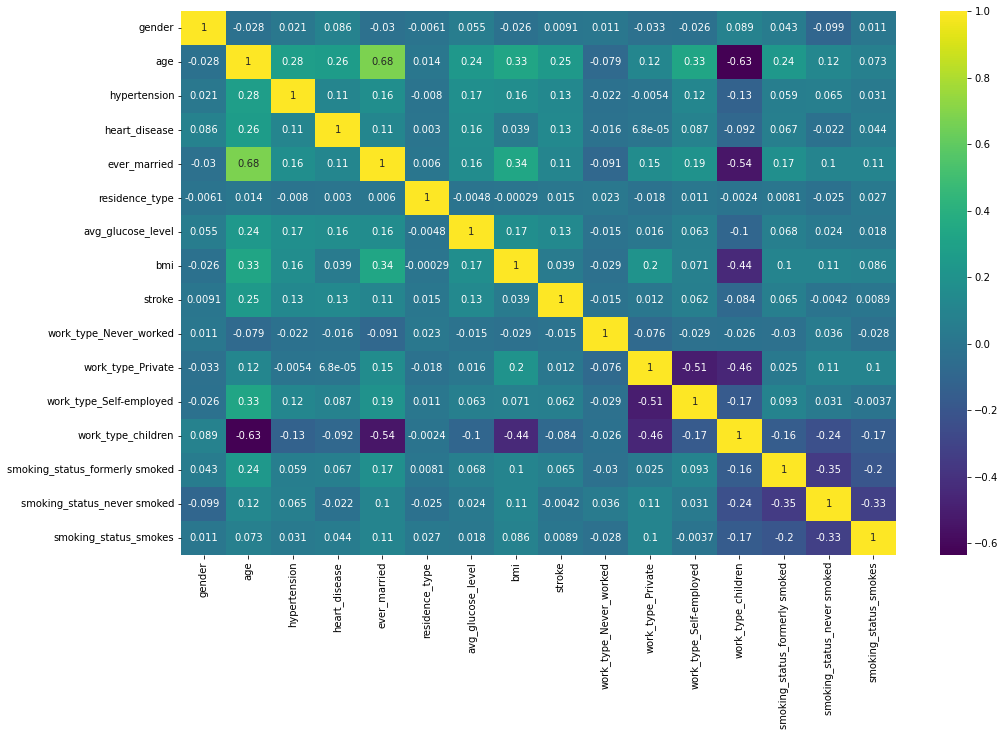

In [9]:
plt.figure(figsize = (16,10))
sns.heatmap(data=strokedummy.corr(), annot=True, cmap="viridis")

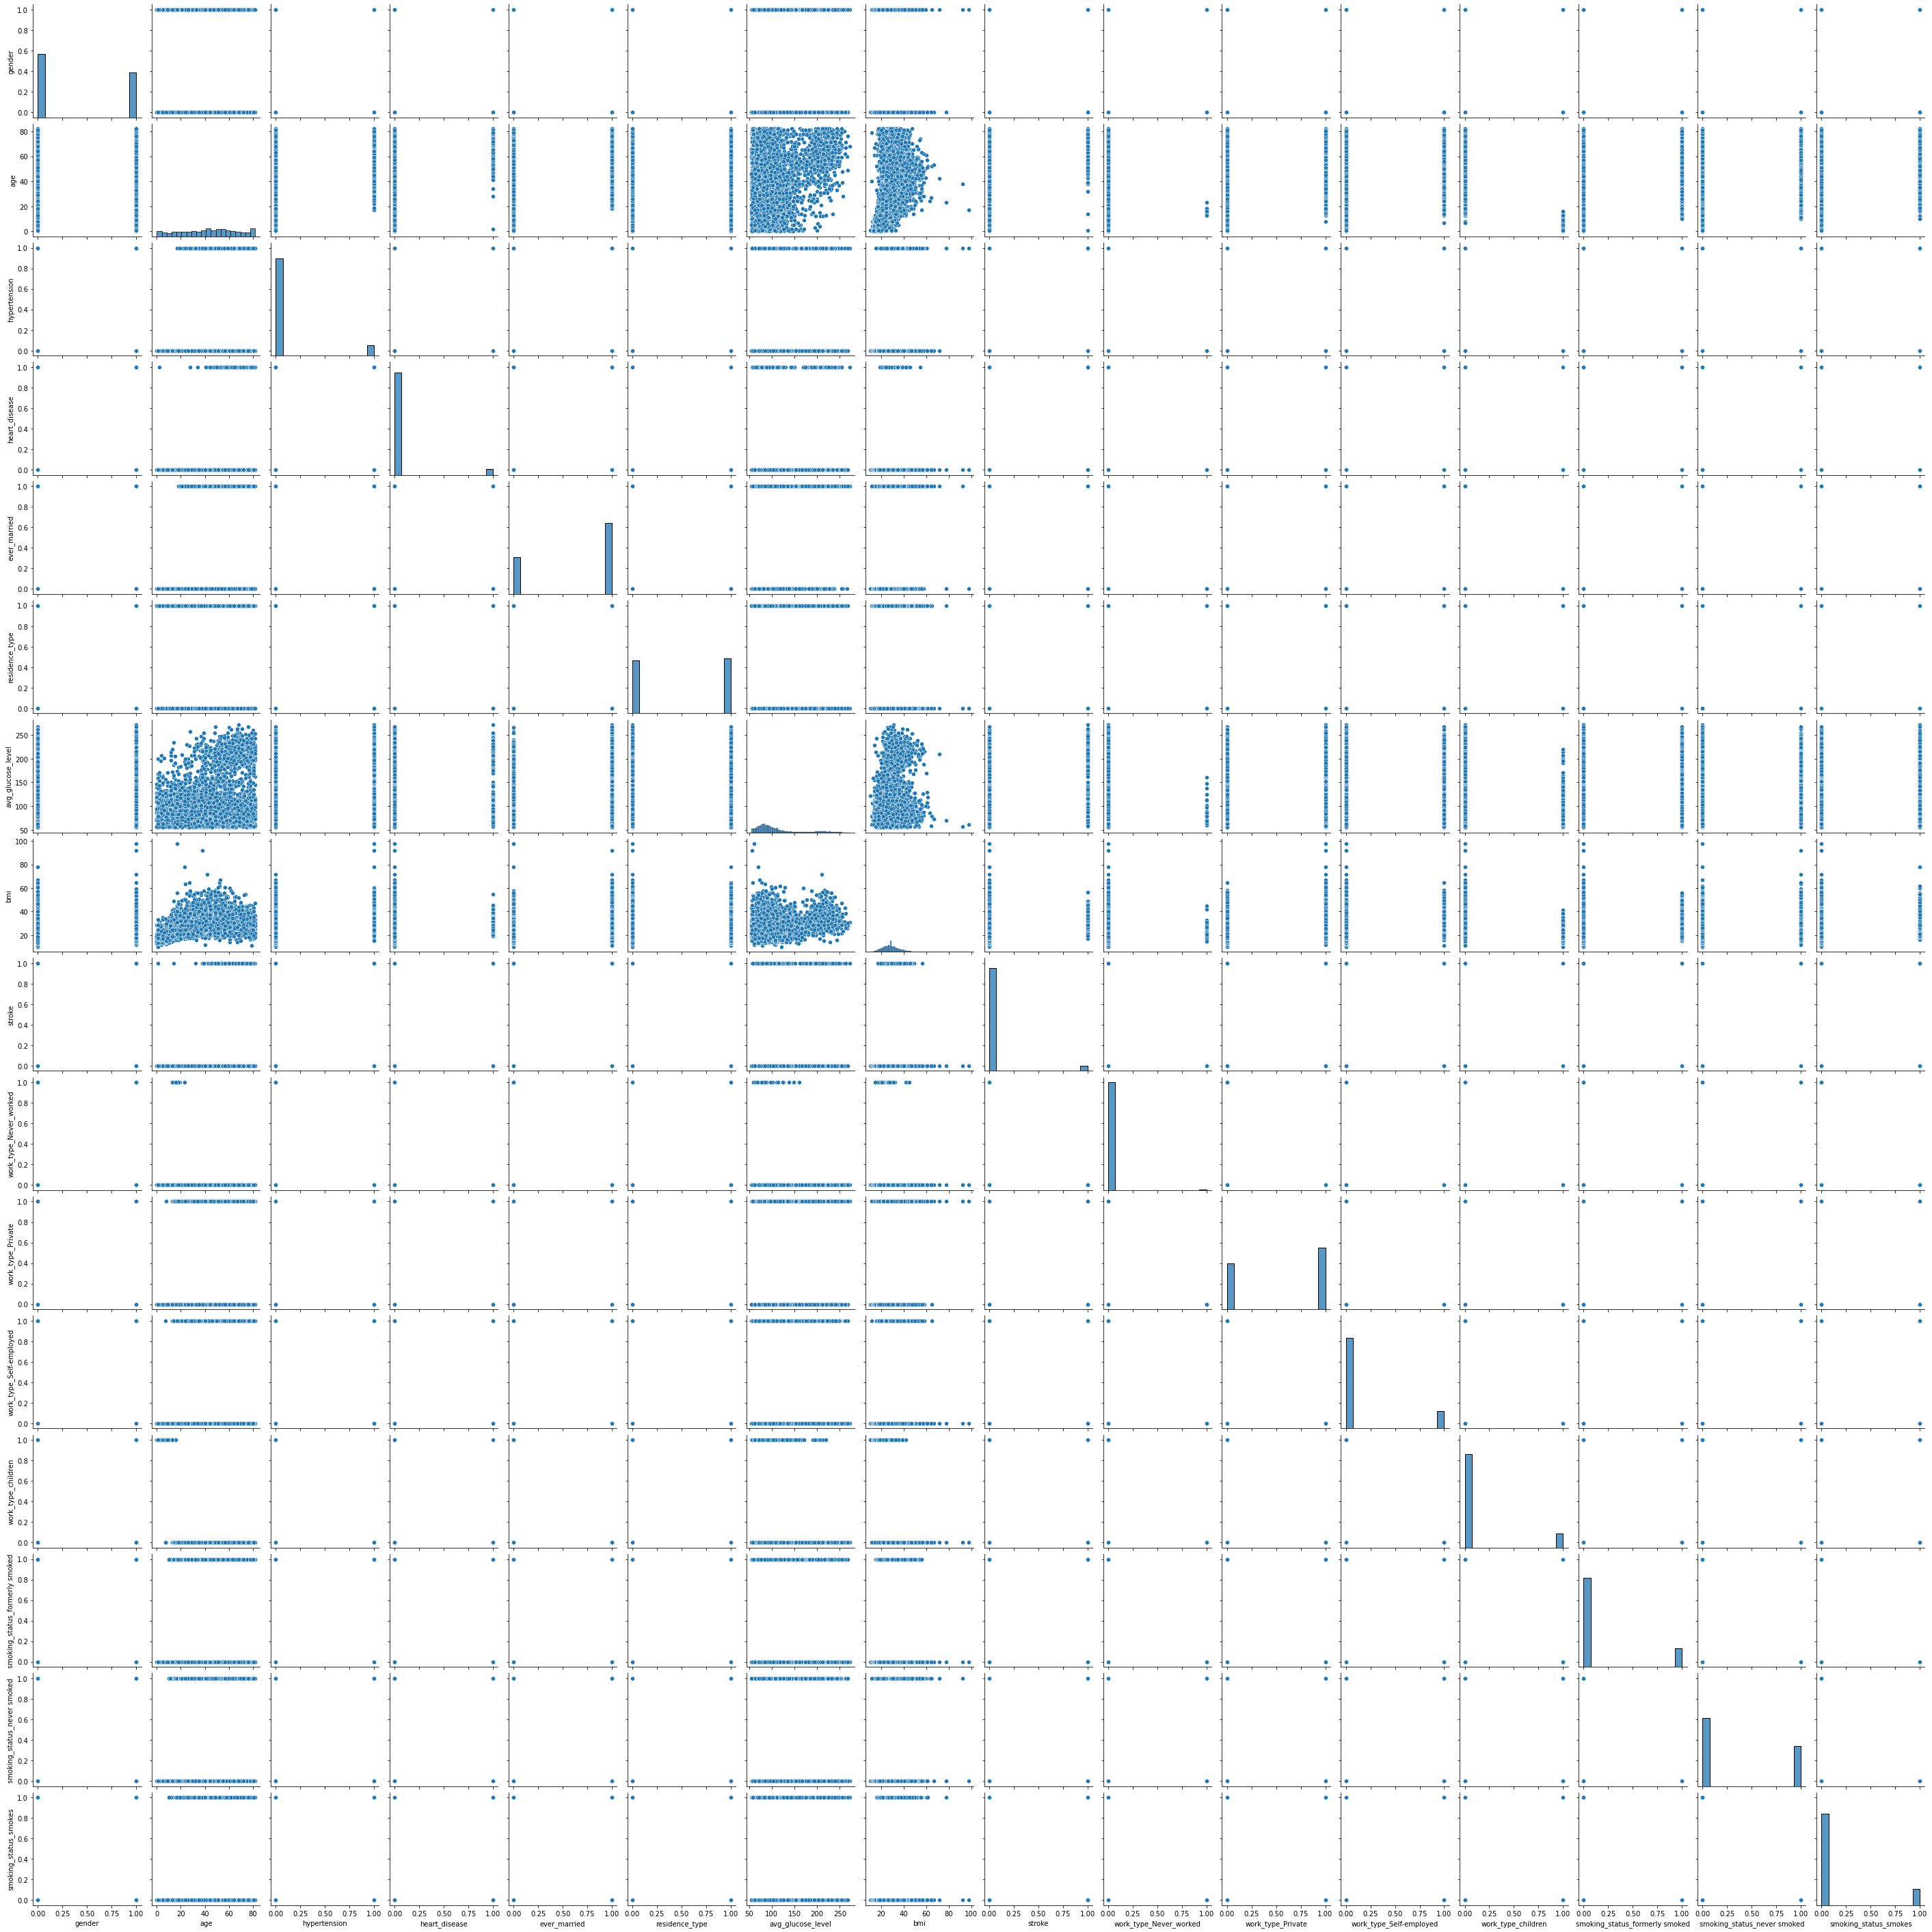

In [10]:
sns.pairplot(strokedummy)

In [11]:
#instantiate model 
logreg = LogisticRegression()

#assign variables
feature_cols = ['age']
X = strokedummy[feature_cols]
y = strokedummy.stroke

#fit
logreg.fit(X,y)
pred = logreg.predict(X)

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [13]:
# Train test split 

#To test on original sample, use code below
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#To test on oversampled data, use code below 
ros=RandomOverSampler()
X, y = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, random_state=1)

#fit model
logreg.fit(X_train,y_train)


LogisticRegression()

### Score the model 

Due to class imbalance, baseline accuracy is 94%, which is the proportion of the majority class label.
The imbalance, makes accuracy a poor measurement of performance.
Will use f1 score for evaluation of model performance


In [14]:
#Score the model.
y_pred=logreg.predict(X_test)

print (f'test score: {logreg.score(X_test,y_test)}')
print (f'train score: {logreg.score(X_train,y_train)}')

class_eval(y_test, y_pred)

test score: 0.7625514403292181
train score: 0.7655692729766804
accuracy  = 0.763
precision = 0.735
recall    = 0.821
f1-score  = 0.776


In [15]:
cross_val_score(logreg,X,y,cv=5, scoring='f1').mean()


0.7771749319562804

Decreasing classification threshold below decreases accuracy, increases TPR and increases FPR. High FNs, which is not good for health predictions

In [16]:
# Get probability predictions.
logreg_pred_proba = logreg.predict_proba(X_test)[:,1]

#Create a confusion matrix
metrics.confusion_matrix(y_true=y_test, y_pred=logreg_pred_proba > .5)

#TN=872      FP=343
#FN=199       TP=1016


array([[856, 359],
       [218, 997]])

In [17]:
#accuracy = TP + TN/total
accuracy= 1203/(1203+75)
print(accuracy)

#TPR = TP/ all actually postitves
TPR = 0/(75)
print(TPR)
    
#FPR = FP/ all actual negatives
FPR= 0/1203
print(FPR)

0.9413145539906104
0.0
0.0


### Visualizing logistic regression

because of the class imbalance of stroke (most stroke values are 0), the model always predicts 0

Text(0, 0.5, 'stroke')

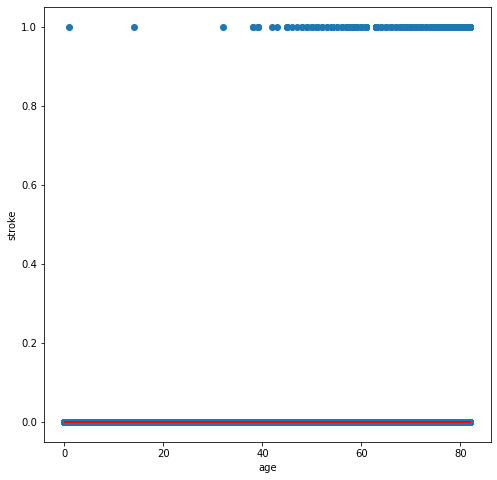

In [18]:
# Plot the class predictions.
plt.scatter(strokedummy.age, strokedummy.stroke)
plt.plot(strokedummy.age, pred, color='red')
plt.xlabel('age')
plt.ylabel('stroke')


In [19]:
#instantiate and fit statistics model 
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.669554
         Iterations 4


In [20]:
#view stats
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 7290
Model:                          Logit   Df Residuals:                     7289
Method:                           MLE   Df Model:                            0
Date:                Fri, 20 May 2022   Pseudo R-squ.:                 0.03404
Time:                        16:25:08   Log-Likelihood:                -4881.0
converged:                       True   LL-Null:                       -5053.0
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0075      0.000     18.244      0.000       0.007       0.008


## Increase number of features logistic regression

In [21]:
#reassign values to test with multiple features
feature_cols = ['age','hypertension','heart_disease', 'avg_glucose_level']
X = strokedummy[feature_cols]
y = strokedummy.stroke


In [22]:
# Train test split data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

#fit
logreg.fit(X_train,y_train)



LogisticRegression()

### Score the model 

Scoring the model shows that adding features does not change model performance. Will not use this model in the future. 

In [23]:
y_pred=logreg.predict(X_test)

print (f'test score: {logreg.score(X_test,y_test)}')
print (f'train score: {logreg.score(X_train,y_train)}')

class_eval(y_test, y_pred)

test score: 0.9413145539906104
train score: 0.9545810493343775
accuracy  = 0.941
precision = 0.0
recall    = 0.0
f1-score  = 0.0


/Users/abigailworkmeister/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
cross_val_score(logreg,X,y,cv=5, scoring='f1').mean()

0.0

In [25]:
# Get probability predictions.
logreg_pred_proba = logreg.predict_proba(X_test)[:,1]

#Create a confusion matrix
metrics.confusion_matrix(y_true=y_test, y_pred=logreg_pred_proba > .5)

#TN=1203      FP=0
#FN=75        TP=0

array([[1203,    0],
       [  75,    0]])

In [26]:
#accuracy = TP + TN/total
accuracy= 1203/(1203+75)
print(accuracy)

#TPR = TP/ all actually postitves
TPR = 0/75
print(TPR)

#FPR = FP/ all actual negatives
FPR= 0/1203
print(FPR)

0.9413145539906104
0.0
0.0


# Decision Tree Classifier

In [27]:
#Instantiate the model
dt= DecisionTreeClassifier(random_state=1)

#assign variables
y = strokedummy['stroke']
X = strokedummy.drop('stroke',axis = 1)

#random over sample and train test split
#instantiate
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, random_state=1)

#test train split (for original sample )
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
#fit the model 
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

We can already see that the decision tree performs better on original data than the logistic regression. f1 score is 0.167 and CV is 0.144

In [29]:
#Score the model.

y_pred=dt.predict(X_test)

class_eval(y_test, y_pred)

print (f'test score: {dt.score(X_test,y_test)}')
print (f'train score: {dt.score(X_train,y_train)}')

accuracy  = 0.977
precision = 0.956
recall    = 1.0
f1-score  = 0.977
test score: 0.9769547325102881
train score: 1.0


In [30]:
# Cross validation using f1 
cross_val_score(dt,X,y,cv=5, scoring='f1').mean()

0.973580692992703

In [31]:
#get feature importances
dt.feature_importances_
# Creating a dataframe to make feature importances more usable 
pd.DataFrame({'features':X.columns,'importance':dt.feature_importances_*10}).sort_values('importance', ascending = False)


,features,importance
1,age,4.635432
6,avg_glucose_level,2.234563
7,bmi,1.667462
13,smoking_status_never smoked,0.266483
5,residence_type,0.187115
9,work_type_Private,0.165471
0,gender,0.162466
10,work_type_Self-employed,0.156173
12,smoking_status_formerly smoked,0.124916
2,hypertension,0.121567


In [32]:
dt.tree_.max_depth

22

In [33]:
from pprint import pprint

pprint(dt.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}


### Visualize tree

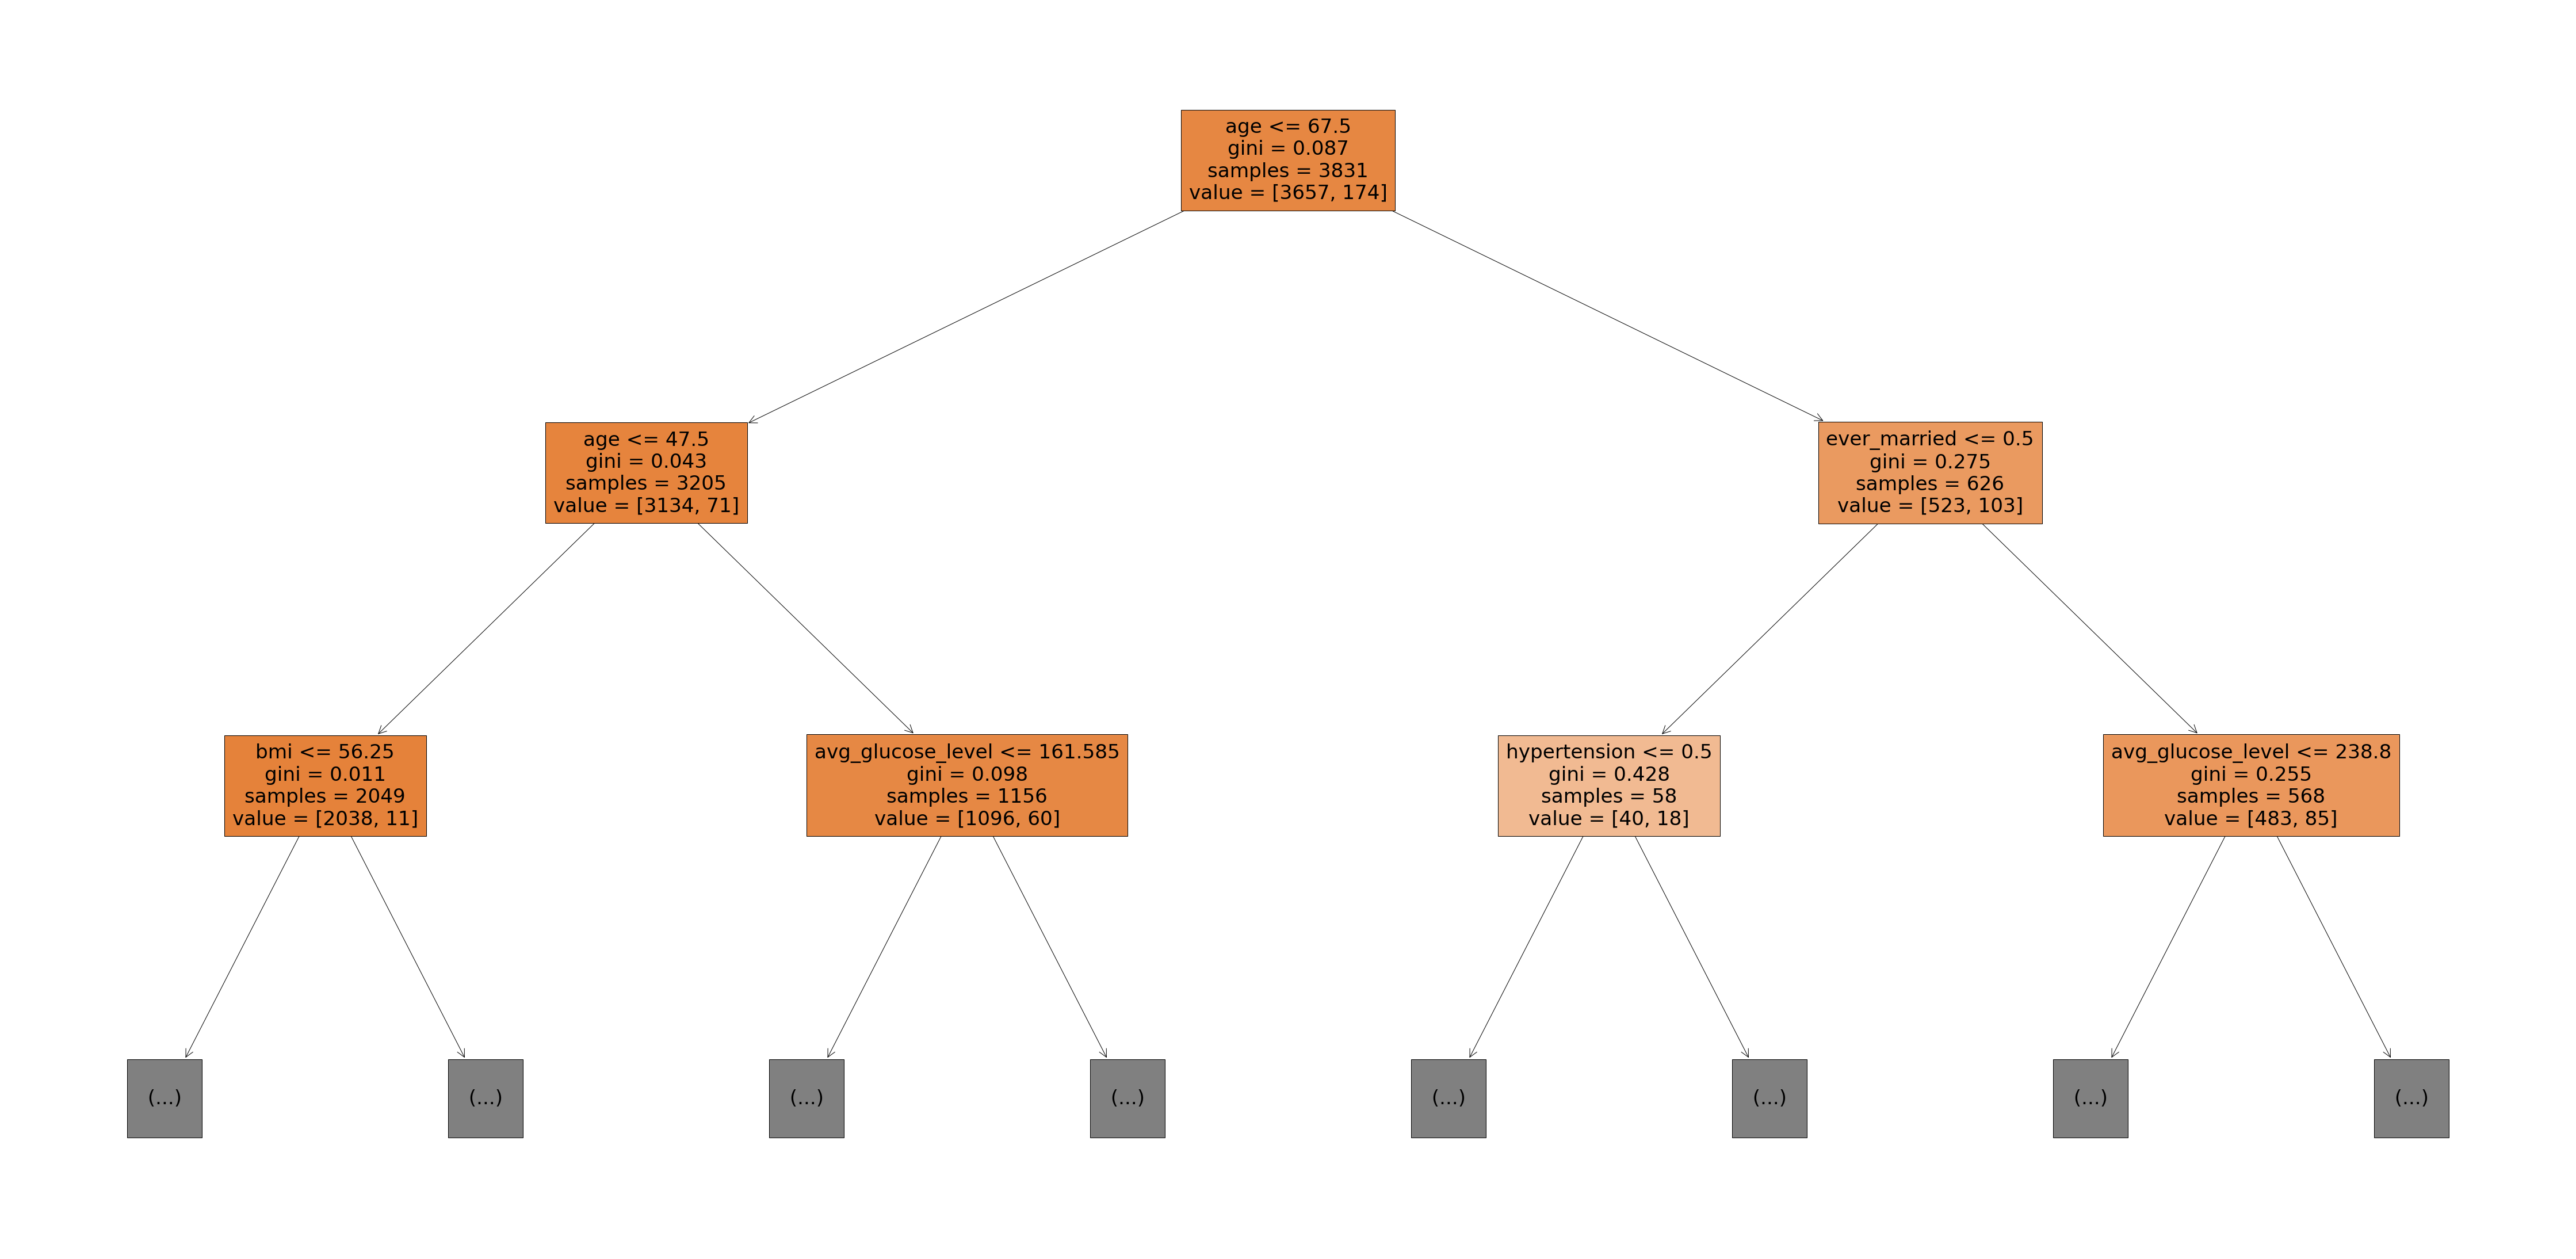

In [34]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,40))

plot_tree(dt, feature_names=X.columns, max_depth=2, filled=True);

## Decision Tree: Manual hyperparameter tuning

In [33]:
# list of values to try for max_depth
max_depth_range = range(1, 25)

# list to store the f1 for each value of max_depth
f1_scores = []

# Iterate through all the different max depths

for depth in max_depth_range:
    treeclass=DecisionTreeClassifier(max_depth=depth,random_state=1)
    scores= cross_val_score(treeclass,X_train,y_train,cv=5, scoring ='f1')
    f1_scores.append(np.mean(scores))

In [34]:
#elbow plot
sorted(zip(max_depth_range,f1_scores))

[(1, 0.7824189852256815),
 (2, 0.7824189852256815),
 (3, 0.7694541124929561),
 (4, 0.7893196218683431),
 (5, 0.8170059735961723),
 (6, 0.8345092440085387),
 (7, 0.8577188787343104),
 (8, 0.8761410559646979),
 (9, 0.8965367045301867),
 (10, 0.9127297255485383),
 (11, 0.9296679036603266),
 (12, 0.9387354851412028),
 (13, 0.9442060913248644),
 (14, 0.9530977550566926),
 (15, 0.9564008453886232),
 (16, 0.9594835683427508),
 (17, 0.9625769515150555),
 (18, 0.9658739878862355),
 (19, 0.9658538006916781),
 (20, 0.9671311841240993),
 (21, 0.9678986388031425),
 (22, 0.9668787828360272),
 (23, 0.9675306902240427),
 (24, 0.967658833829255)]

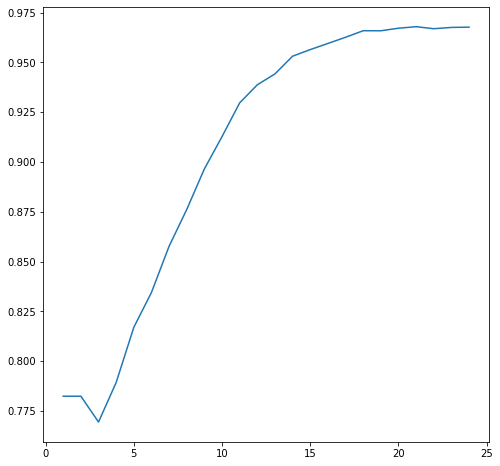

In [35]:
plt.plot(max_depth_range,f1_scores)

In [36]:
pd.DataFrame({'max_depth':max_depth_range,'f1_scores':f1_scores}).sort_values('f1_scores', ascending = False)

,max_depth,f1_scores
20,21,0.967899
23,24,0.967659
22,23,0.967531
19,20,0.967131
21,22,0.966879
17,18,0.965874
18,19,0.965854
16,17,0.962577
15,16,0.959484
14,15,0.956401


In [37]:
# list of values to try for max_depth
max_features = range(1, 16)

# list to store the f1 for each value of max_depth
f1_scores = []

# Iterate through all the different max depths

for features in max_features:
    treeclass=DecisionTreeClassifier(max_features=features,random_state=1)
    scores= cross_val_score(treeclass,X_train,y_train,cv=5, scoring ='f1')
    f1_scores.append(np.mean(scores))

In [38]:
#elbow plot
sorted(zip(max_features,f1_scores))

[(1, 0.9695519572713263),
 (2, 0.9689016403031726),
 (3, 0.9685530879144523),
 (4, 0.9707189475816367),
 (5, 0.9698264077782868),
 (6, 0.9696804550677873),
 (7, 0.9708585176852573),
 (8, 0.9699606407335069),
 (9, 0.9720298176446773),
 (10, 0.9683948740291056),
 (11, 0.9668572775166526),
 (12, 0.9703468622908792),
 (13, 0.9693092261768829),
 (14, 0.9711143008853217),
 (15, 0.9677886934330318)]

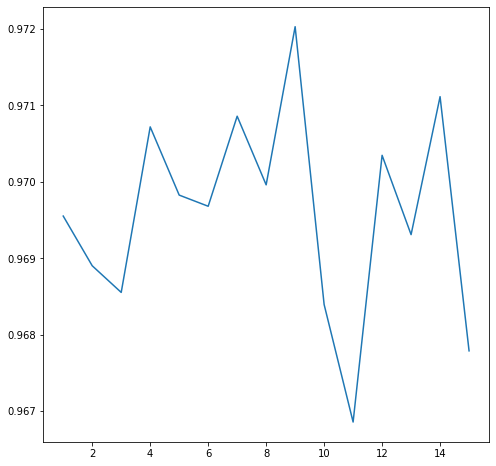

In [39]:
plt.plot(max_features,f1_scores)

In [40]:
pd.DataFrame({'max_features':max_features,'f1_scores':f1_scores}).sort_values('f1_scores', ascending = False)

,max_features,f1_scores
8,9,0.972030
13,14,0.971114
6,7,0.970859
3,4,0.970719
11,12,0.970347
7,8,0.969961
4,5,0.969826
5,6,0.969680
0,1,0.969552
12,13,0.969309


In [41]:
#Instantiate the model with manually tuned hyperparameters
mantune_dt= DecisionTreeClassifier(max_depth=16, max_features=3)

#fit the model 
mantune_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=16, max_features=3)

### Score the model 

accuracy  = 0.96
precision = 0.927
recall    = 1.0
f1-score  = 0.962
null accuracy = 0.5
test score: 0.9604938271604938
train score: 0.9945130315500685
CV = 0.9670310249713214

In [42]:
#Score the model.

y_pred=mantune_dt.predict(X_test)

class_eval(y_test, y_pred)

print (f'test score: {mantune_dt.score(X_test,y_test)}')
print (f'train score: {mantune_dt.score(X_train,y_train)}')

accuracy  = 0.969
precision = 0.941
recall    = 1.0
f1-score  = 0.97
test score: 0.968724279835391
train score: 0.9950617283950617


In [43]:
#in depth scoring of the model 
class_eval(y_test, y_pred)

accuracy  = 0.969
precision = 0.941
recall    = 1.0
f1-score  = 0.97


In [44]:
#get feature importances
mantune_dt.feature_importances_
# Creating a dataframe to make feature importances more usable 
pd.DataFrame({'features':X.columns,'importance':mantune_dt.feature_importances_*10}).sort_values('importance', ascending = False)



,features,importance
1,age,3.991796
7,bmi,1.940920
6,avg_glucose_level,1.756040
2,hypertension,0.542688
5,residence_type,0.254217
12,smoking_status_formerly smoked,0.247032
13,smoking_status_never smoked,0.241106
0,gender,0.199495
9,work_type_Private,0.176351
10,work_type_Self-employed,0.161129


In [45]:
# Cross validation using f1 
f1_cv_dt_mantuned=cross_val_score(mantune_dt,X,y,cv=5, scoring='f1').mean()
print(f1_cv_dt_mantuned)

0.9666028475840566


/Users/abigailworkmeister/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


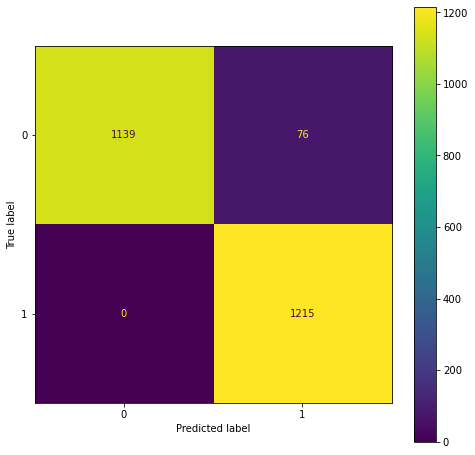

In [46]:
plot_confusion_matrix(mantune_dt, X_test, y_test);
#TN=1119      FP=96
#FN=0        TP=1215

#Less FNs than FPs, good for health predictions

## Decision tree: Hyperparameter tuning with GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters={"max_depth" : range(1,50),
            "max_features": range(1,50),
            "max_leaf_nodes": range(1,50) }

In [49]:
tuning_model=GridSearchCV(dt,param_grid=parameters,scoring='f1',cv=5,verbose=2, n_jobs=-1)

In [50]:
tuning_model.fit(X_train,y_train)

Fitting 5 folds for each of 117649 candidates, totalling 588245 fits
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=1; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=4; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=5; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=6; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=6; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=8; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=9; total time=   0.0s
[CV] END .....max_depth=1, max_features=1, max_leaf_nodes=10; total time=   0.0s
[CV] END .....max_depth=1, max_features=1, max_leaf_nodes=11; total time=   0.0s
[CV] END .....max_depth=1, max_features=1, max_leaf_nodes=12; total time=   0.0s
[CV] END .....max_depth=1, max_features=1, max_leaf_nodes=14; total time=   0.0s
[CV] END .....max_depth=1, max_features=

[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=1; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=3; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=4; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=5; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=5; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=6; total time=   0.0s
[CV] END ......max_depth=1, max_features=1, max_leaf_nodes=7; total time=   0.0s
[CV] END .....max_depth=1, max_features=1, max_leaf_nodes=10; total time=   0.0s
[CV] END .....max_depth=1, max_features=1, max_leaf_nodes=13; total time=   0.0s
[CV] END .....max_depth=1, max_features=1, max_leaf_nodes=13; total time=   0.0s
[CV] END .....max_depth=1, max_features=1, max_leaf_nodes=15; total time=   0.0s
[CV] END .....max_depth=1, m

[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=20; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=20; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=20; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=20; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=21; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=21; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=21; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=21; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=21; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=22; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=22; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=22; total time=   0.0s
[CV] END ......max_depth=1, 

[CV] END ......max_depth=1, max_features=5, max_leaf_nodes=5; total time=   0.0s
[CV] END ......max_depth=1, max_features=5, max_leaf_nodes=5; total time=   0.0s
[CV] END ......max_depth=1, max_features=5, max_leaf_nodes=5; total time=   0.0s
[CV] END ......max_depth=1, max_features=5, max_leaf_nodes=5; total time=   0.0s
[CV] END ......max_depth=1, max_features=5, max_leaf_nodes=6; total time=   0.0s
[CV] END ......max_depth=1, max_features=5, max_leaf_nodes=6; total time=   0.0s
[CV] END ......max_depth=1, max_features=5, max_leaf_nodes=6; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=29; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=29; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=29; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=29; total time=   0.0s
[CV] END .....max_depth=1, max_features=5, max_leaf_nodes=29; total time=   0.0s
[CV] END .....max_depth=1, m

[CV] END .....max_depth=1, max_features=6, max_leaf_nodes=42; total time=   0.0s
[CV] END .....max_depth=1, max_features=6, max_leaf_nodes=42; total time=   0.0s
[CV] END .....max_depth=1, max_features=6, max_leaf_nodes=42; total time=   0.0s
[CV] END .....max_depth=1, max_features=6, max_leaf_nodes=43; total time=   0.0s
[CV] END .....max_depth=1, max_features=6, max_leaf_nodes=43; total time=   0.0s
[CV] END .....max_depth=1, max_features=6, max_leaf_nodes=43; total time=   0.0s
[CV] END .....max_depth=1, max_features=6, max_leaf_nodes=43; total time=   0.0s
[CV] END .....max_depth=1, max_features=6, max_leaf_nodes=43; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=20; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=20; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=21; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=21; total time=   0.0s
[CV] END .....max_depth=1, m

[CV] END ......max_depth=1, max_features=4, max_leaf_nodes=6; total time=   0.0s
[CV] END ......max_depth=1, max_features=4, max_leaf_nodes=6; total time=   0.0s
[CV] END ......max_depth=1, max_features=4, max_leaf_nodes=6; total time=   0.0s
[CV] END ......max_depth=1, max_features=4, max_leaf_nodes=7; total time=   0.0s
[CV] END ......max_depth=1, max_features=4, max_leaf_nodes=7; total time=   0.0s
[CV] END ......max_depth=1, max_features=4, max_leaf_nodes=7; total time=   0.0s
[CV] END .....max_depth=1, max_features=4, max_leaf_nodes=33; total time=   0.0s
[CV] END .....max_depth=1, max_features=4, max_leaf_nodes=33; total time=   0.0s
[CV] END .....max_depth=1, max_features=4, max_leaf_nodes=33; total time=   0.0s
[CV] END .....max_depth=1, max_features=4, max_leaf_nodes=33; total time=   0.0s
[CV] END .....max_depth=1, max_features=4, max_leaf_nodes=34; total time=   0.0s
[CV] END .....max_depth=1, max_features=4, max_leaf_nodes=34; total time=   0.0s
[CV] END .....max_depth=1, m

[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=13; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=13; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=13; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=13; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=14; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=43; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=43; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=43; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=43; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=43; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=44; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=44; total time=   0.0s
[CV] END .....max_depth=1, m

[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=25; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=25; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=25; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=25; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=25; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=26; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=26; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=26; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=26; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=26; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=49; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=49; total time=   0.0s
[CV] END .....max_depth=1, m

[CV] END ....max_depth=1, max_features=13, max_leaf_nodes=36; total time=   0.1s
[CV] END ....max_depth=1, max_features=13, max_leaf_nodes=36; total time=   0.1s
[CV] END ....max_depth=1, max_features=13, max_leaf_nodes=36; total time=   0.1s
[CV] END ....max_depth=1, max_features=13, max_leaf_nodes=36; total time=   0.1s
[CV] END ....max_depth=1, max_features=13, max_leaf_nodes=36; total time=   0.1s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=18; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=18; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=19; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=19; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=19; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=19; total time=   0.0s
[CV] END .....max_depth=1, max_features=7, max_leaf_nodes=19; total time=   0.0s
[CV] END .....max_depth=1, m

[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=17; total time=   0.1s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=17; total time=   0.1s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=17; total time=   0.0s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=17; total time=   0.1s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=18; total time=   0.1s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=18; total time=   0.1s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=18; total time=   0.1s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=18; total time=   0.0s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=18; total time=   0.0s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=19; total time=   0.1s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=19; total time=   0.0s
[CV] END ....max_depth=1, max_features=11, max_leaf_nodes=19; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=19; total time=   0.0s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=19; total time=   0.1s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=19; total time=   0.1s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=19; total time=   0.1s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=19; total time=   0.1s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=20; total time=   0.1s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=20; total time=   0.0s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=20; total time=   0.0s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=20; total time=   0.0s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=46; total time=   0.1s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=46; total time=   0.1s
[CV] END ....max_depth=1, max_features=10, max_leaf_nodes=46; total time=   0.0s
[CV] END ....max_depth=1, ma

[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=6; total time=   0.1s
[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=6; total time=   0.1s
[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=6; total time=   0.1s
[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=6; total time=   0.1s
[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=6; total time=   0.1s
[CV] END .....max_depth=1, max_features=14, max_leaf_nodes=7; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=29; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=26; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=26; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=27; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=27; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=27; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=27; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=27; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=28; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=28; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=28; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=28; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=28; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=41; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=41; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=42; total time=   0.1s
[CV] END ....max_depth=1, max_features=14, max_leaf_nodes=42; total time=   0.1s
[CV] END ....max_depth=1, max_features=15, max_leaf_nodes=11; total time=   0.1s
[CV] END ....max_depth=1, max_features=15, max_leaf_nodes=12; total time=   0.1s
[CV] END ....max_depth=1, max_features=15, max_leaf_nodes=14; total time=   0.1s
[CV] END ....max_depth=1, max_features=15, max_leaf_nodes=14; total time=   0.1s
[CV] END ....max_depth=1, max_features=15, max_leaf_nodes=17; total time=   0.1s
[CV] END ....max_depth=1, max_features=15, max_leaf_nodes=17; total time=   0.1s
[CV] END ....max_depth=1, max_features=15, max_leaf_nodes=19; total time=   0.1s
[CV] END ....max_depth=1, max_features=15, max_leaf_nodes=20; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END .....max_depth=1, max_features=15, max_leaf_nodes=4; total time=   0.1s
[CV] END .....max_depth=1, max_features=15, max_leaf_nodes=4; total time=   0.1s
[CV] END .....max_depth=1, max_features=15, max_leaf_nodes=4; total time=   0.1s
[CV] END .....max_depth=1, max_features=15, max_leaf_nodes=4; total time=   0.1s
[CV] END .....max_depth=1, max_features=15, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=15, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=15, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=15, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=15, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=15, max_leaf_nodes=6; total time=   0.1s
[CV] END ....max_depth=1, max_features=15, max_leaf_nodes=14; total time=   0.1s
[CV] END ....max_depth=1, max_features=15, max_leaf_nodes=14; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=30; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=33; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=34; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=37; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=37; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=40; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=40; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=43; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=44; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=46; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=46; total time=   0.1s
[CV] END ....max_depth=1, max_features=19, max_leaf_nodes=49; total time=   0.1s
[CV] END .....max_depth=1, m

[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=37; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=40; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=40; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=44; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=44; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=47; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=47; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=3; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=3; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=6; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=9; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=36; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=37; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=40; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=40; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=42; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=43; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=46; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=46; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=49; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=49; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=4; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=4; total time=   0.1s
[CV] END .....max_depth=1, m

[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=22; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=25; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=25; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=28; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=29; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=31; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=31; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=34; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=34; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=37; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=37; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=40; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=42; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=45; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=45; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=48; total time=   0.1s
[CV] END ....max_depth=1, max_features=20, max_leaf_nodes=48; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=1; total time=   0.0s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=2; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=4; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=4; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=7; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=7; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=11; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=24; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=25; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=28; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=28; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=32; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=32; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=35; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=35; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=38; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=38; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=41; total time=   0.1s
[CV] END ....max_depth=1, max_features=24, max_leaf_nodes=41; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=9; total time=   0.1s
[CV] END .....max_depth=1, max_features=21, max_leaf_nodes=9; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=12; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=12; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=15; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=15; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=18; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=18; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=21; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=21; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=24; total time=   0.1s
[CV] END ....max_depth=1, max_features=21, max_leaf_nodes=24; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=14; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=17; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=18; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=21; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=21; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=23; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=24; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=26; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=26; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=29; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=30; total time=   0.1s
[CV] END ....max_depth=1, max_features=25, max_leaf_nodes=33; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=19; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=19; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=22; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=22; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=25; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=25; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=28; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=28; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=31; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=31; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=34; total time=   0.1s
[CV] END ....max_depth=1, max_features=28, max_leaf_nodes=35; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=31, max_leaf_nodes=39; total time=   0.1s
[CV] END ....max_depth=1, max_features=31, max_leaf_nodes=40; total time=   0.1s
[CV] END ....max_depth=1, max_features=31, max_leaf_nodes=43; total time=   0.1s
[CV] END ....max_depth=1, max_features=31, max_leaf_nodes=43; total time=   0.1s
[CV] END ....max_depth=1, max_features=31, max_leaf_nodes=46; total time=   0.1s
[CV] END ....max_depth=1, max_features=31, max_leaf_nodes=46; total time=   0.1s
[CV] END ....max_depth=1, max_features=31, max_leaf_nodes=49; total time=   0.1s
[CV] END ....max_depth=1, max_features=31, max_leaf_nodes=49; total time=   0.1s
[CV] END .....max_depth=1, max_features=32, max_leaf_nodes=4; total time=   0.1s
[CV] END .....max_depth=1, max_features=32, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=32, max_leaf_nodes=8; total time=   0.1s
[CV] END .....max_depth=1, max_features=32, max_leaf_nodes=8; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=11; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=11; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=14; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=14; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=17; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=17; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=20; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=20; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=23; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=23; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=26; total time=   0.1s
[CV] END ....max_depth=1, max_features=32, max_leaf_nodes=27; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=44; total time=   0.1s
[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=44; total time=   0.1s
[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=47; total time=   0.1s
[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=48; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=1; total time=   0.0s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=1; total time=   0.0s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=2; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=2; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=8; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=8; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=40, max_leaf_nodes=20; total time=   0.1s
[CV] END ....max_depth=1, max_features=40, max_leaf_nodes=21; total time=   0.1s
[CV] END ....max_depth=1, max_features=40, max_leaf_nodes=24; total time=   0.1s
[CV] END ....max_depth=1, max_features=40, max_leaf_nodes=24; total time=   0.1s
[CV] END ....max_depth=1, max_features=40, max_leaf_nodes=26; total time=   0.1s
[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=34; total time=   0.1s
[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=37; total time=   0.1s
[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=37; total time=   0.1s
[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=40; total time=   0.1s
[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=40; total time=   0.1s
[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=43; total time=   0.1s
[CV] END ....max_depth=1, max_features=33, max_leaf_nodes=43; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=18; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=18; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=21; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=21; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=24; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=24; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=27; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=27; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=30; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=31; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=33; total time=   0.1s
[CV] END ....max_depth=1, max_features=36, max_leaf_nodes=33; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=40, max_leaf_nodes=23; total time=   0.1s
[CV] END ....max_depth=1, max_features=40, max_leaf_nodes=27; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=2; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=2; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=4; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=5; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=8; total time=   0.1s
[CV] END .....max_depth=1, max_features=34, max_leaf_nodes=8; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=11; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=11; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=14; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=14; total time=   0.1s
[CV] END ....max_depth=1, ma

[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=29; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=29; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=32; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=33; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=36; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=36; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=38; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=39; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=42; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=42; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=45; total time=   0.1s
[CV] END ....max_depth=1, max_features=34, max_leaf_nodes=45; total time=   0.1s
[CV] END ....max_depth=1, ma

KeyboardInterrupt: 

In [ ]:
# best hyperparameters 
tuning_model.best_params_

In [51]:
#Instantiate model with GridSearchCV tuned parameters
tuned_dt=DecisionTreeClassifier( max_depth=33, max_features= 13, max_leaf_nodes= 48)
#Fit model
tuned_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=33, max_features=13, max_leaf_nodes=48)

In [52]:
#Score the model.

y_pred=tuned_dt.predict(X_test)

print (f'test score: {tuned_dt.score(X_test,y_test)}')
print (f'train score: {tuned_dt.score(X_train,y_train)}')

test score: 0.8633744855967078
train score: 0.8743484224965706


In [53]:
#in depth scoring of the model 
class_eval(y_test, y_pred)

accuracy  = 0.863
precision = 0.803
recall    = 0.964
f1-score  = 0.876


In [54]:
#get feature importances
tuned_dt.feature_importances_
# Creating a dataframe to make feature importances more usable 
pd.DataFrame({'features':X.columns,'importance':tuned_dt.feature_importances_*10}).sort_values('importance', ascending = False)


,features,importance
1,age,6.585438
7,bmi,1.333500
6,avg_glucose_level,1.275864
13,smoking_status_never smoked,0.250908
2,hypertension,0.153428
0,gender,0.131058
4,ever_married,0.095131
12,smoking_status_formerly smoked,0.062531
3,heart_disease,0.062471
5,residence_type,0.049670


In [55]:
f1_cv_dt_tuned=cross_val_score(tuned_dt,X,y,cv=5, scoring='f1').mean()
print(f1_cv_dt_tuned)

0.8746515326974208


/Users/abigailworkmeister/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


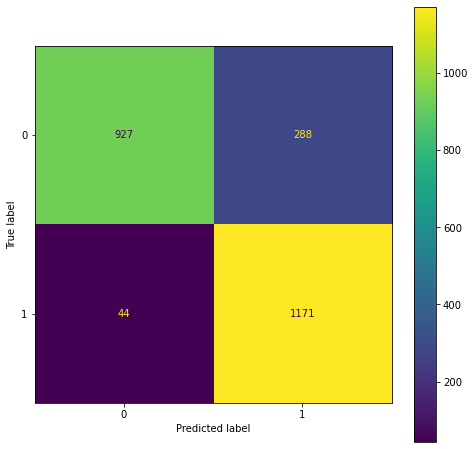

In [56]:
plot_confusion_matrix(tuned_dt, X_test, y_test);
#TN=1154      FP=49
#FN=70        TP=5

#More FNs than FPs, which is not good for health predictions